# Computational Physics Lab Midterm Exam 2019/2020
## Exam rules
1. You must not communicate or attempt to communicate discussing topic related to exam's problem with anyone during the exam.
2. You must not copy or attempt to copy from another student's work
3. You may open your own e-book and your own made pyhon module to help you deliver your best answer.

## Instruction
Run the following code cell to fill your name, student number, and class base on your actual status then replace this notebook filename with your complete name without spaces.

In [1]:
name = input('Input your name here: ')
nim = input('Input your student number here: ')
clas = input('Input your class here: ')

print('\nMy name is ' + name + ', student number '+ nim +', I hereby declare myself that I have read the exam rules and I am intent to obey it. In any case during the exam I proved to violate the rules, I sincerely let my exam score be canceled.')

Input your name here: Dhoni Ikhsan Widodo
Input your student number here: 11180970000024
Input your class here: A

My name is Dhoni Ikhsan Widodo, student number 11180970000024, I hereby declare myself that I have read the exam rules and I am intent to obey it. In any case during the exam I proved to violate the rules, I sincerely let my exam score be canceled.


## Problem 1 (30)
<div>
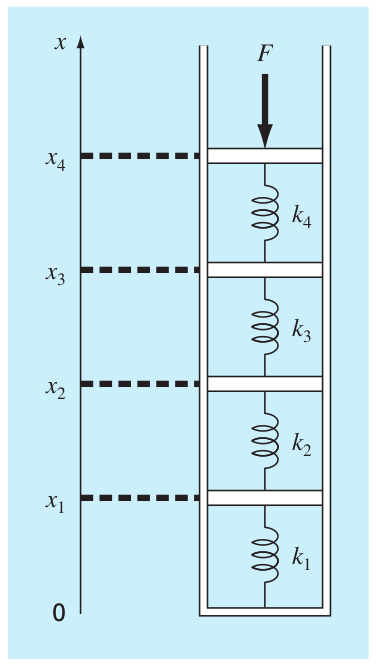
</div>
    
Figure 1 shows an arrangement of four springs in series being depressed with a force of $F$. At equilibrium, force-balance equations can be developed defining the interrelationships between the springs. Write function to compute **x** with general value of spring constant $k_1,k_2,k_3,k_4$ and force $F$ using LU decomposition.

In [2]:
# Number 1
# Ini jawaban untuk nomor 1
#write your import module here
import numpy as np
from LUdecomp3 import *

#write your code here
def fourBalanceSpring(k1,k2,k3,k4,F):
    d = np.array([(k1+k2), (k3+k2), (k3+k4), (k4)]) #diagonal tengah
    c = np.array([k2,k3,k4]) #diagonal paling kiri
    e = c.copy() #diagonal paling kanan
    b = np.array([0.0, 0.0, 0.0, F])
    c,d,e = LUdecomp3(c,d,e)
    hasil = LUsolve3(c,d,e,b)
    
    return abs(hasil)

In [3]:
#write code to validate your function in this cell
print("Hasil perhitungan menggunakan LUdecomp3: \n   x1         x2       x3         x4")
print(fourBalanceSpring(150.0,50.0,75.0,225.0,200.0))




Hasil perhitungan menggunakan LUdecomp3: 
   x1         x2       x3         x4
[1.33333333 5.33333333 8.         8.88888889]


In [4]:
# Ini bukan jawaban nomor 1, tapi hanya sebagai referensi lainnya untuk menyelesaikan problem 1.
# jika konstanta pegas (K) di subtitusikan kedalam matrix
# Hasil nya sama dengan cell yang atas
# Jadi, jawaban nomor 1 nya sudah valid dan dapat dibuktikan dengan perhitungan manual

import numpy as np
from LUdecomp3 import *

my_matrix = np.array([[200.0, -50, 0, 0], \
                      [50.0, -125.0, 75.0, 0.0], \
                      [0.0, 75.0, -300.0, 225], \
                      [0.0, 0.0, -225.0, 225.0]])

def fourBalanceSpring():
    d = np.array([200.0, -125.0, -300.0, 225.0]) #diagonal tengah
    c = np.array([50.0, 75.0, -225.0]) #diagonal paling kiri
    e = np.array([-50.0, 75.0, 225.0]) #diagonal paling kanan
    b = np.array([0.0, 0.0, 0.0, 200.0])
    c,d,e = LUdecomp3(c,d,e)
    hasil = LUsolve3(c,d,e,b)
    
    return hasil
print("my_matrix is:\n",my_matrix)
print('\nHasil perhitungan menggunakan LUdecomp3: \n     x1         x2     x3         x4')
print(fourBalanceSpring())

my_matrix is:
 [[ 200.  -50.    0.    0.]
 [  50. -125.   75.    0.]
 [   0.   75. -300.  225.]
 [   0.    0. -225.  225.]]

Hasil perhitungan menggunakan LUdecomp3: 
     x1         x2     x3         x4
[1.33333333 5.33333333 8.         8.88888889]


## Problem 2 (30)

Compute **x** given in problem 1 using Conjugate Gradient and Gauss-Seidel method with zeros initial guess and tolarance value of $10^{-6}$.

In [5]:
#cell for conjugate gradient
import numpy as np
import math
from conjGrad import *

my_matrix = np.array([[200.0, -50, 0, 0], \
                      [50.0, -125.0, 75.0, 0.0], \
                      [0.0, 75.0, -300.0, 225], \
                      [0.0, 0.0, -225.0, 225.0]])

print("\nNumber of equation = 4 because my_matrix has 4 order")
b = np.array([0.0, 0.0, 0.0, 200.0])
k = eval(input("Number of equations ==> "))
i = np.zeros(k)
j = conjGrad(my_matrix,i,b,k)
np.set_printoptions(suppress=True)

print("my_matrix is:\n",my_matrix)
print("\nThis is solution with conjugate Gradien methods to calculate my_matrix ")
print("\nThe solution is:\n",j)


Number of equation = 4 because my_matrix has 4 order
Number of equations ==> 4
my_matrix is:
 [[ 200.  -50.    0.    0.]
 [  50. -125.   75.    0.]
 [   0.   75. -300.  225.]
 [   0.    0. -225.  225.]]

This is solution with conjugate Gradien methods to calculate my_matrix 

The solution is:
 [  0.          -0.38675497 -25.56644592  31.09639441]


In [6]:
#cell for gauss-seidel
import numpy as np
import math
from gaussSeidel import *

def iterEqs(x,omega):
    n = len(x)
    x[0] = (-1/200)*omega*(-50*x[1]) + (1.0 - omega)*x[0]
    x[n-3] = (1/125)*omega*(50*x[0] + 75*x[n-2]) + (1.0 - omega)*x[n-3]
    x[n-2] = (1/300)*omega*(75*x[1] +  225*x[n-1]) + (1.0 - omega)*x[n-2]
    x[n-1] = (1/225)*omega*(200.0 + 225*x[n-2]) + (1.0 - omega)*x[n-1]
    return x

my_matrix = np.array([[200.0, -50, 0, 0], \
                      [50.0, -125.0, 75.0, 0.0], \
                      [0.0, 75.0, -300.0, 225], \
                      [0.0, 0.0, -225.0, 225.0]])

print("\nNumber of equation = 4 because my_matrix has 4 order")
n = eval(input("Number of equations ==> "))
y = np.zeros(n)
y,numIter,omega = gaussSeidel(iterEqs,y)

print("my_matrix is:\n",my_matrix)
print("\nNumber of iterations =",numIter)
print("\nRelaxation factor =",omega)
print("\nThis is solution with Gauss-Seidel methods to calculate my_matrix ")
print("\nThe solution is:\n",y)


Number of equation = 4 because my_matrix has 4 order
Number of equations ==> 4
my_matrix is:
 [[ 200.  -50.    0.    0.]
 [  50. -125.   75.    0.]
 [   0.   75. -300.  225.]
 [   0.    0. -225.  225.]]

Number of iterations = 165

Relaxation factor = 1.0

This is solution with Gauss-Seidel methods to calculate my_matrix 

The solution is:
 [1.33333197 5.33332833 7.99999318 8.88888207]


## Problem 3 (25)

|x|-2|1|4|-1|3|-4|
|-|-|-|-|-|-|-|
|y|-1|2|59|4|24|-53|

The points on previous Table lie on a polynomial. Do the polynomial interpolation to those points and plot the result.

In [1]:
# Number 3
#import your modul here
import numpy as np
import math
from newtonPoly import *
from plotPoly import *
from polyFit import *

#import your code here
# Rules to execute the program with the best result
print("Input degree of polynomial = 5 for the best result")
m = eval(input("\nDegree of polynomial ==> "))
print('') #Just space to other line
print("by using the newton's polynomial we can find the values of x and y from the data we have:\n")
x_data = np.array([-2.0,1.0,4.0,-1.0,3.0,-4.0])
y_data = np.array([-1.0,2.0,59.0,4.0,24.0,-53.0])


def find_data():
    coefficient = polyFit(x_data,y_data,m)
    a = coeffts(x_data,y_data)
    print("data x           data y") 
    print(25*"_")
    for x in np.arange(-5.0,5.5,0.5): 
        y = evalPoly(a,x_data,x)
        print('{:3.1f} {:20.5f}'.format(x,y))
        
    print("\nthen, it's just a fitting from our data")
    print(plotPoly(x_data,y_data,coefficient))
    
print(find_data())

Input degree of polynomial = 5 for the best result

Degree of polynomial ==> 5

by using the newton's polynomial we can find the values of x and y from the data we have:

data x           data y
_________________________
-5.0           -112.00000
-4.5            -79.12500
-4.0            -53.00000
-3.5            -32.87500
-3.0            -18.00000
-2.5             -7.62500
-2.0             -1.00000
-1.5              2.62500
-1.0              4.00000
-0.5              3.87500
0.0              3.00000
0.5              2.12500
1.0              2.00000
1.5              3.37500
2.0              7.00000
2.5             13.62500
3.0             24.00000
3.5             38.87500
4.0             59.00000
4.5             85.12500
5.0            118.00000

then, it's just a fitting from our data


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

None
None


## Problem 4 (25)

Fit the 6-order polynomial function to the following data and compute the standard deviation.

|x|0.5|1.0|1.5|2.0|2.5|
|-|-|-|-|-|-|
|y|0.541|0.398|0.232|0.106|0.052|

Input degree of polynomial = 1
Then, tap enter to see the result

Degree of polynomial ==> 1
Coefficients are:
 [ 0.6468 -0.254 ]
Std. deviation = 0.03790690350494661

Degree of polynomial ==> 


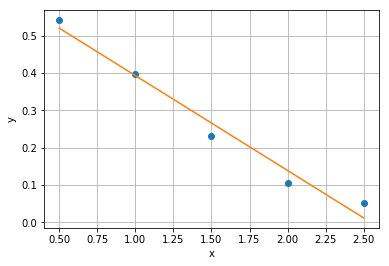

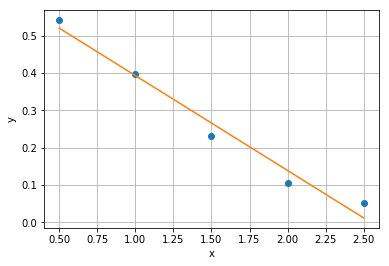

None


In [9]:
# Number 4
# we use least square fit 
# To find standar deviation using polyFit function
# To plotting data using plotPoly function

# impport modul here
import numpy as np
from polyFit import *
from plotPoly import *

# Just rules to execute the program
print("Input degree of polynomial = 1")
print("Then, tap enter to see the result")

# Find standar deviation
x_data = np.array([0.5,1.0,1.5,2.0,2.5])
y_data = np.array([0.541,0.398,0.232,0.106,0.052])
while True:
    try:
        m = eval(input("\nDegree of polynomial ==> "))
        coeff = polyFit(x_data,y_data,m)
        print("Coefficients are:\n",coeff)
        print("Std. deviation =",stdDev(coeff,x_data,y_data))
    except SyntaxError: break
        
# Plot/Fitting data
print(plotPoly(x_data,y_data,coeff))

Input degree of polynomial = 1
Then, type 'break' to see the result

Degree of polynomial ==> 1
Coefficients are:
 [ 0.6468 -0.254 ]
Std. deviation = 0.03790690350494661

Degree of polynomial ==> 


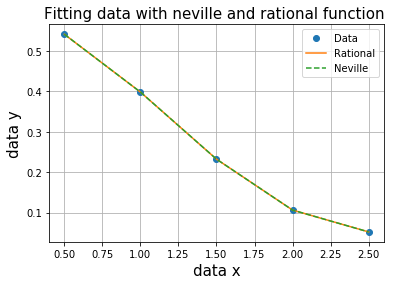

In [10]:
# Code lainnya untuk menyelesaikan problem 4
# kita dapat mencari standar deviasi dengan polyFit function 
# dan meplotting/fitting data nya dengan neville, lalu membandingkan nya dengan rational function 
# grafik nya sama dengan cell diatas
# Jadi, jawaban nomor 4 nya sudah valid dan dapat dibuktikan dengan menggunakan neville, rational ataupun least square

import numpy as np
from rational import *
from neville import *
from newtonPoly import *
from polyFit import *
from plotPoly import *
import matplotlib.pyplot as plt


# Just rules to execute the program
print("Input degree of polynomial = 1")
print("Then, type 'break' to see the result")

# Find standart deviation
x_data = np.array([0.5,1.0,1.5,2.0,2.5])
y_data = np.array([0.541,0.398,0.232,0.106,0.052])
while True:
    try:
        m = eval(input("\nDegree of polynomial ==> "))
        coeff = polyFit(x_data,y_data,m)
        print("Coefficients are:\n",coeff)
        print("Std. deviation =",stdDev(coeff,x_data,y_data))
    except SyntaxError: break
        
# Plotting with neville and compare with rational line 
x = np.arange(0.5,3.0,0.5)
n = len(x)
y = np.zeros((n,2))
for i in range(n):
    y[i,0] = rational(x_data,y_data,x[i])
    y[i,1] = neville(x_data,y_data,x[i])
    
plt.plot(x_data,y_data,'o',x,y[:,0],'-',x,y[:,1],'--')
plt.title('Fitting data with neville and rational function ', size=15)
plt.xlabel('data x', size=15)
plt.ylabel('data y', size=15)
plt.grid()
plt.legend(('Data','Rational','Neville'),loc = 0)
plt.show()